<a href="https://colab.research.google.com/github/thezachdrake/UMD-INST760-Summer2024/blob/main/notebooks/sstaub.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


You are helping a propsective student determine which colleges to which they should submit applicaitons. The data below is the results of the 2025 QS University Rankings. More informaiton can be found [here](https://support.qs.com/hc/en-gb/articles/4405955370898-QS-World-University-Rankings).

Your student lives in the United States currently. Is there a benefit to moving to a different counrty for school? Do larger schools invest more in reducing their environmental impact? Will their choice of school impact their ability to find a job? Will they be presented with opputunities to learn from other cultures as well as their own?

Your main takeaway should be helping the student assess the differences for them if they chose different types and locations of school. Your main plot might signify a particular school or it might signify a certain size or location of schools. Consider the questions being asked and what might be most useful to this student in making their decision.

In [4]:
from google.colab import files
uploaded = files.upload()
df = pd.read_csv("data.csv")
df.rename(columns=lambda x: x[0].lower() + x.strip().lower().replace(' ', '_')[1:], inplace=True)
df = df.convert_dtypes()
df

Saving data.csv to data.csv


,2025_rank,2024_rank,institution_name,location,location_full,size,academic_reputation,employer_reputation,faculty_student,citations_per_faculty,international_faculty,international_students,international_research_network,employment_outcomes,sustainability,qs_overall_score
0,1,1,Massachusetts Institute of Technology (MIT),US,United States,M,100.0,100.0,100.0,100.0,99.3,86.8,96.0,100.0,99.0,100
1,2,6,Imperial College London,UK,United Kingdom,L,98.5,99.5,98.2,93.9,100.0,99.6,97.4,93.4,99.7,98.5
2,3,3,University of Oxford,UK,United Kingdom,L,100.0,100.0,100.0,84.8,98.1,97.7,100.0,100.0,85.0,96.9
3,4,4,Harvard University,US,United States,L,100.0,100.0,96.3,100.0,74.1,69.0,99.6,100.0,84.4,96.8
4,5,2,University of Cambridge,UK,United Kingdom,L,100.0,100.0,100.0,84.6,100.0,94.8,99.3,100.0,84.8,96.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1498,1401+,1201-1400,University of Montana Missoula,US,United States,M,3.0,2.2,10.6,6.1,1.3,1.9,6.5,3.1,1.0,-
1499,1401+,1401+,University of Oradea,RO,Romania,L,5.6,2.2,4.0,1.9,1.5,5.2,34.5,6.2,2.3,-
1500,1401+,1201-1400,University of San Carlos,PH,Philippines,M,7.2,9.4,3.3,1.8,2.1,2.1,6.4,9.6,1.0,-
1501,1401+,1401+,"University Politehnica of Timisoara, UPT",RO,Romania,L,4.1,4.2,7.2,3.9,1.4,2.5,18.6,3.9,1.1,-


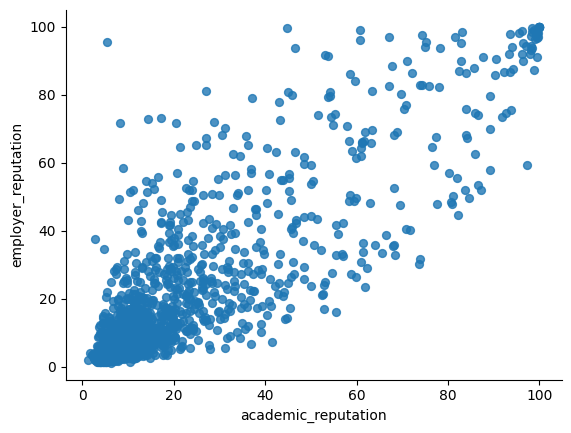

In [ ]:
df.plot(kind='scatter', x='academic_reputation', y='employer_reputation', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

<Axes: xlabel='2024_rank', ylabel='2025_rank'>

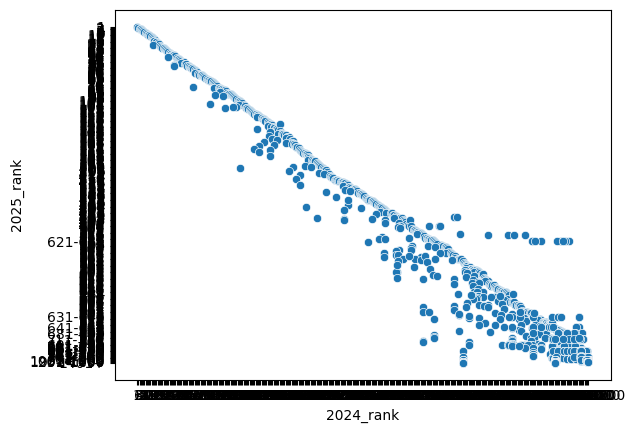

In [ ]:
sns.scatterplot(x="2024_rank", y="2025_rank", data=df)



In [ ]:
df.dtypes

,0
2025_rank,string[python]
2024_rank,string[python]
institution_name,string[python]
location,string[python]
location_full,string[python]
size,string[python]
academic_reputation,Float64
employer_reputation,Float64
faculty_student,Float64
citations_per_faculty,Float64


   2025_rank 2024_rank                                   institution_name  \
0          1         1       Massachusetts Institute of Technology (MIT)    
1          2         6                            Imperial College London   
2          3         3                               University of Oxford   
3          4         4                                 Harvard University   
4          5         2                            University of Cambridge   
..       ...       ...                                                ...   
95        96       111                              University of Alberta   
96        97        98                          Freie Universitaet Berlin   
97        98       100  Pohang University of Science And Technology (P...   
98        99       106                             RWTH Aachen University   
99       100       107                           University of Copenhagen   

   location   location_full size  academic_reputation  employer_reputation 

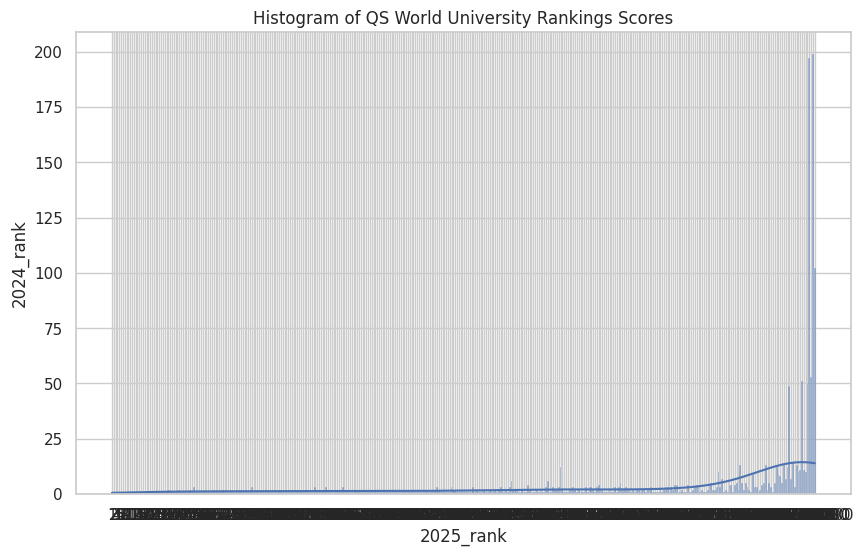

In [9]:
# Display the first few rows of the DataFrame
print(df.head(100))

# Create a Seaborn style plot for the '2025_rank' column
sns.set(style="whitegrid")

# Create a histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['2025_rank'], bins=10, kde=True)

# Add labels and title
plt.xlabel('2025_rank')
plt.ylabel('2024_rank')
plt.title('Histogram of QS World University Rankings Scores')

# Show the plot
plt.show()

Thinking about the needs of this student
maybe they are looking for a high touch university, in which case we should look at the faculty_student ratio information
If they are looking for employment in the US after graduation, it makes the most sense to look at US schools, so which ones have the best employer_reputation as well as employment_outcomes.


TypeError: 'str' object is not callable

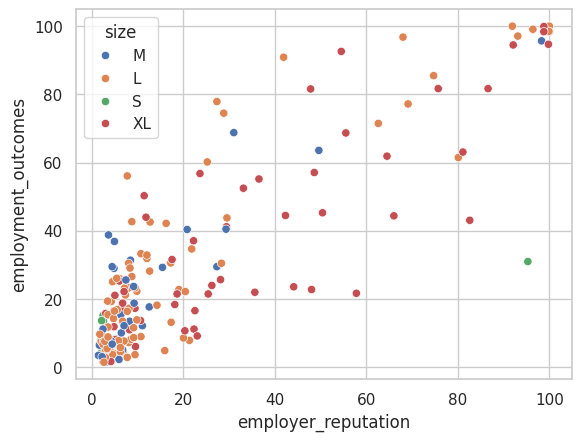

In [32]:
df_us = df[df['location'] == 'US']
sns.set(style="whitegrid")
sns.scatterplot(x="employer_reputation", y="employment_outcomes", data=df_us, hue="size")
# Add a title using matplotlib
plt.title = plt.title
plt.title("US Schools")